In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import argparse
import imutils
WORKPATH = "D:/GameProjects/Kartrider/SmartKartRider"
RAW_DATA_PATH = WORKPATH + "/raw_data/US"

In [2]:
class ShapeDetector:
    def __init__(self):
        pass

    def detect(self, c):
        # 初始化形状名称并近似轮廓
        shape = "unidentified"
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.04 * peri, True)
        # 如果形状是一个三角形，它将有3个顶点
        if len(approx) == 3:
            shape = "triangle"
        # 如果形状有4个顶点，它要么是正方形，要么是矩形
        elif len(approx) == 4:
            # 计算轮廓的包围框，并使用包围框计算高宽比
            (x, y, w, h) = cv2.boundingRect(approx)
            ar = w / float(h)
            # 正方形的长宽比大约等于1，否则，形状就是矩形
            shape = "square" if ar >= 0.95 and ar <= 1.05 else "rectangle"
        # 如果形状是一个五边形，它将有5个顶点
        elif len(approx) == 5:
            shape = "pentagon"
        # 否则，我们假设形状是一个圆
        else:
            shape = "circle"
        # 返回形状的名称
        return shape

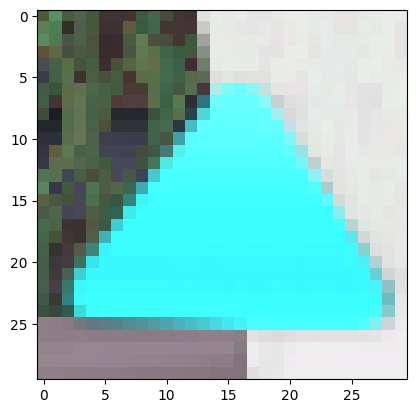

In [26]:
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", default="inpaint.jpg", help="path to the input image")
# args = vars(ap.parse_args())
image_obj = cv2.imread(RAW_DATA_PATH + '/SmallMap/2.png')[80:110, 85:115]
plt.imshow(cv2.cvtColor(image_obj, cv2.COLOR_BGR2RGB))

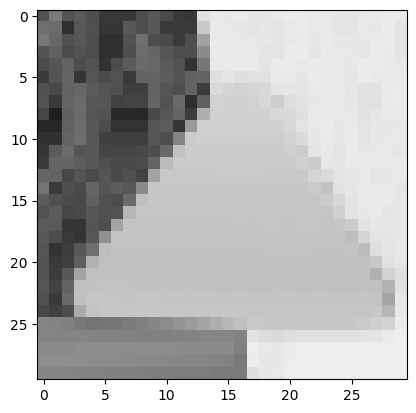

In [27]:
gray = cv2.cvtColor(image_obj, cv2.COLOR_BGR2GRAY)

plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

In [33]:
# # 在阈值化图像中找到轮廓并初始化形状检测器
# thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 3, 2)
# plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB))

In [32]:
# kernel = np.ones((1, 1), np.uint8) #腐蚀
# dilation = cv2.dilate(thresh, kernel, iterations=1)
# plt.imshow(cv2.cvtColor(dilation, cv2.COLOR_BGR2RGB))

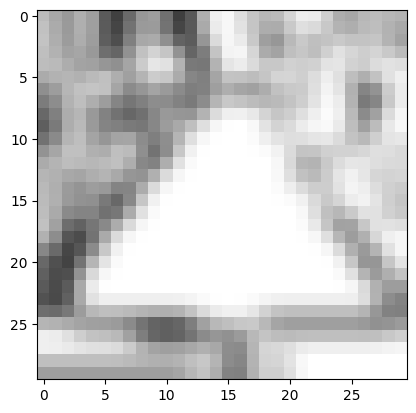

In [31]:
# 将调整后的图像转换为灰度，稍微模糊它，并阈值化 #模糊
blur = cv2.GaussianBlur(dilation, (5, 5), 0)
# blur = cv2.medianBlur(dilation, 5)
plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))

In [ ]:
# # Now finding Contours         ###################
# contours, hierarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
# coordinates = []
# for cnt in contours:
#         # [point_x, point_y, width, height] = cv2.boundingRect(cnt)
#     approx = cv2.approxPolyDP(
#         cnt, 0.07 * cv2.arcLength(cnt, True), True)
#     if len(approx) == 3:
#         coordinates.append([cnt])
#         cv2.drawContours(image_obj, [cnt], 0, (0, 0, 255), 3)
#
# cv2.imwrite("result.png", image_obj)
# plt.imshow(image_obj, cmap = "gray")

In [ ]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
                        cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
sd = ShapeDetector()

In [ ]:
resized = imutils.resize(image_obj, width=300)
ratio = image_obj.shape[0] / float(resized.shape[0])

for c in cnts:
    # 计算轮廓的中心，然后仅使用轮廓检测形状的名称
    M = cv2.moments(c)
    cX = int((M["m10"] / M["m00"]) * ratio)
    cY = int((M["m01"] / M["m00"]) * ratio)
    shape = sd.detect(c)
    # 将轮廓(x, y)坐标乘以调整比例，然后在图像上绘制轮廓和形状的名称
    c = c.astype("float")
    c *= ratio
    c = c.astype("int")
    cv2.drawContours(image_obj, [c], -1, (0, 255, 0), 2)
    cv2.putText(image_obj, shape, (cX, cY), cv2.FONT_HERSHEY_SIMPLEX,
                0.5, (255, 255, 255), 2)
    # 显示输出图像
    cv2.imshow("Image", image_obj)
    cv2.waitKey(0)